**Signal Processing Project**

In [1]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
pd.set_option("display.expand_frame_repr", False)

In [2]:
# Importing the dataset
df = pd.read_csv("dataset/water_potability.csv")

# Viewing some information about the dataset
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [3]:
# Viewing some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


N/A values:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64



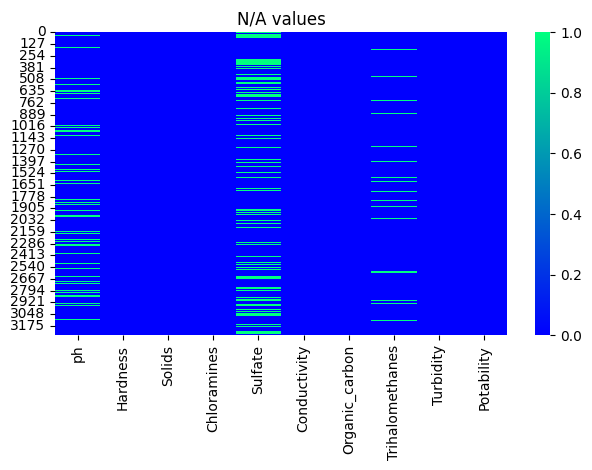

In [4]:
# Checking for missing values
print(f"N/A values:\n{df.isnull().sum()}\n")

sns.heatmap(data=df.isnull(), cmap="winter")
plt.title("N/A values")
plt.tight_layout()
plt.show()

Average ph value:  7.080794504276835
Average Sulfate value:  333.7757766108135
Average Trihalomethanes value:  66.39629294676803
N/A values:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64



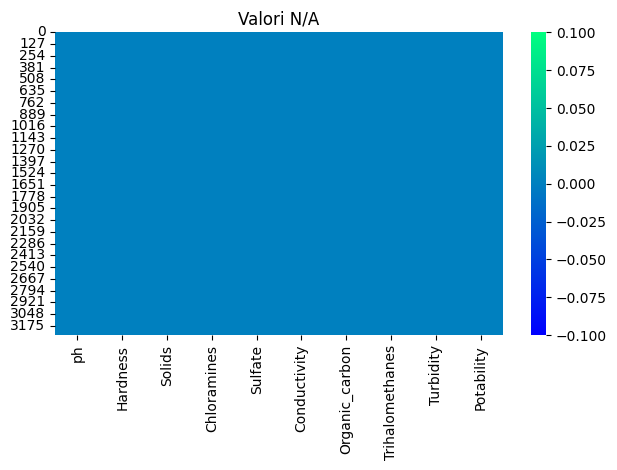

In [5]:
# Handling missing values (fill them with the mean of the column)
print("Average ph value: ", df["ph"].mean())
print("Average Sulfate value: ", df["Sulfate"].mean())
print("Average Trihalomethanes value: ", df["Trihalomethanes"].mean())

df["ph"].fillna(df["ph"].mean(), inplace=True)
df["Sulfate"].fillna(df["Sulfate"].mean(), inplace=True)
df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean(), inplace=True)

print(f"N/A values:\n{df.isnull().sum()}\n")

sns.heatmap(data=df.isnull(), cmap="winter")
plt.title("Valori N/A")
plt.tight_layout()
plt.show()

In [6]:
# Checking value uniqueness for column "Potability"
print(f"Unique values for column Potability:\n{df['Potability'].unique()}\n")

Unique values for column Potability:
[0 1]



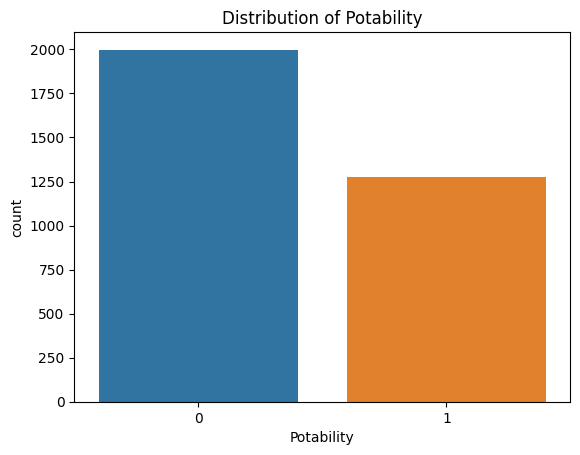

In [7]:
# Plotting the distribution of the values for column "Potability"
sns.countplot(x="Potability", data=df)
plt.title("Distribution of Potability")
plt.show()

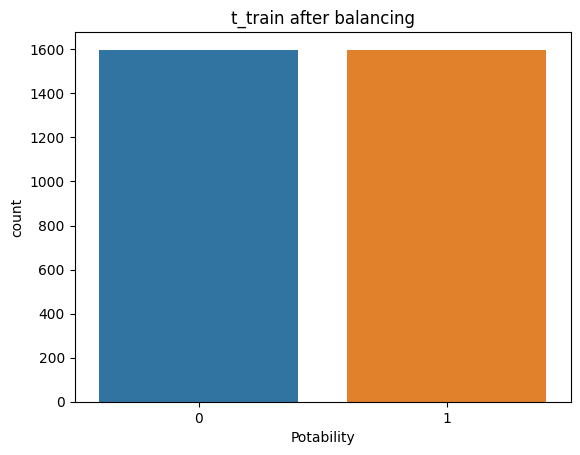

In [8]:
# Selecting the features and the target
t = df["Potability"]

X = df.drop(columns=["Potability"])

# Splitting the data into train and test with stratification (the distribution of the values for column "Potability" is not balanced)
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.2, stratify=t, random_state=42)

# Scaling the data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Balancing the data
smt = SMOTE(sampling_strategy="not majority", random_state=42)
X_train, t_train = smt.fit_resample(X_train, t_train)

sns.countplot(x=t_train, data=df)
plt.title("t_train after balancing")
plt.show()

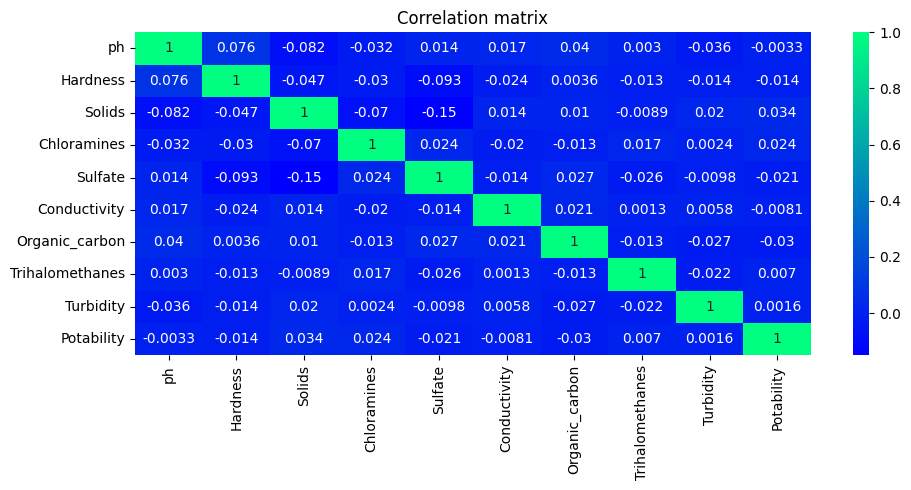

In [9]:
# Displaying the correlation matrix
plt.figure(figsize=(10,5))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="winter")
plt.title("Correlation matrix")
plt.tight_layout()
plt.show()

In [10]:
# Converting the data into a dataframe
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [11]:
# Printing the shapes of the data
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of t_train: ", t_train.shape)
print("Shape of t_test: ", t_test.shape)

Shape of X_train:  (3196, 9)
Shape of X_test:  (656, 9)
Shape of t_train:  (3196,)
Shape of t_test:  (656,)


In [12]:
# Saving the dataframes into csv files
X_train.to_csv("dataset/X_train.csv", index=False)
X_test.to_csv("dataset/X_test.csv", index=False)
t_train.to_csv("dataset/t_train.csv", index=False)
t_test.to_csv("dataset/t_test.csv", index=False)